## MVP Sprint 2: Qualidade de Software, Segurança e Sistemas Inteligentes
## Márcia Maria Furlanetto                         11/11/2023

## Dataset Employee - Kaggle

Dados do dataset:
- Education - Grau de escolaridade:   (1) Bachelors  (2) Masters  (3) PhD;
- JoiningYear - Ano de admissão;
- PaymentTier - Nível salarial:  1; 2 ou3
- Gender - Gênero:     (1) Male   (2) Female
- EverBanched - Esteve sem alocação no trabalho: (0) No  (1) Yes
- ExperienceInCurrentDomain - Experiência na função atual:    0 à 7
Classe
- LeaveOrNot - Deixará ou não o emprego:   (0) No  (1) Yes



## Problema a resolver

Dentre várias possibilidades de se avaliar estes dados, escolhi verificar a resiliência quando ocorre ficar sem alocação no trabalho, e se o grau de escolaridade poderia influenciar na decisão de ficar no emprego.

## Preparação dos dados

O dataset original possui 4653 linhas.

Total: 4653
deixarão o emprego(leaveOrNot=1): 1600
não deixarão o emprego(leaveOrNot0):3053

O dataset original tinha dados do ano 2012 até 2018. Ocorre que a maioria dos dados de 2018 estavam indicando que os empregados deixaram o emprego. Como isso pareceu uma distorção, os dados de 2018 foram excluídos do dataset.

Foi separado manualmente 500 entradas do ano 2017 para ser o dataset golden, escolhidas de forma aleatória.
Os demais ficaram no dataset para treinar o modelo.

Preparação:

1) Retirada da informação Localidade;

2) Mapeamento das colunas para valores inteiros:
    Escolaridade (Education)
        Bacharel (Bachelors) -> 1
        Mestre (Masters) -> 2
        Phd (PHD) -> 3
    Gênero (Gender)
        Masculino (Male) -> 1
        Feminino (Female) -> 0
        
    

## Escolha do Modelo de Machine Learning

Foi utilizado o Colab para testar os modelos: KNN, CART, Naive-Bayes e SVM.

O melhor resultado foi para o SVM padronizado.

## Métrica
Foi escolhida a Acurácia (acertos de previsão), que deverá ser maior ou igual a 70%.

## Aplicação web
   1 - O modelo treinado será colocado no backend;
   2 - O usuário pode fornecer dados de um empregado e obter a previsão se deixará ou não o emprego;
   3 - O sistema permitirá realizar testes com um dataset gold, a fim de obter a acurácia, e verificar se o modelo treinado atende ao requisito mínimo de acurácia.



In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [4]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/mfurlanetto-lab/MVPSprint2/main/Employee.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',', encoding='utf-8')

# Mostra as primeiras linhas do dataset
dataset.head()

# Education:    (1) Bachelors  (2) Masters  (3) PhD
# JoiningYear:
# PaymentTier: 1; 2 ou3
# Gender:       (1) Male   (2) Female
# EverBanched:  (0) No  (1) Yes
# ExperienceInCurrentDomain:    (0) No  (1) Yes
# LeaveOrNot:   (0) No  (1) Yes

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,2,2012,3,27,1,0,5,1
1,1,2012,3,37,1,0,4,0
2,1,2012,3,37,1,0,0,0
3,1,2012,3,29,1,0,3,0
4,3,2012,3,27,1,0,5,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:7]
y = array[:,7]

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.755282 (0.018668)
CART: 0.780060 (0.027727)
NB: 0.748017 (0.019217)
SVM: 0.705416 (0.001280)


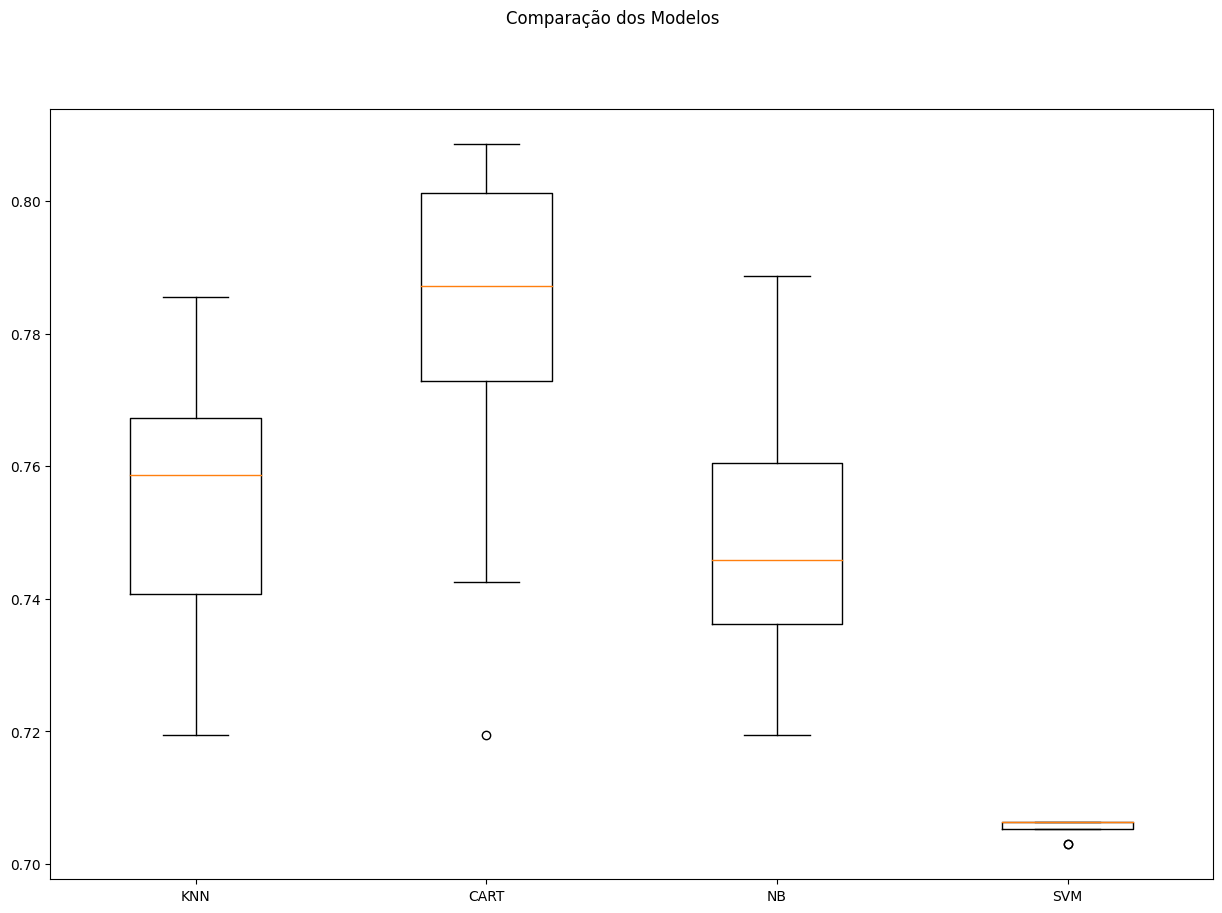

In [ ]:
# Avaliação dos modelos com a base de treino

np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:

    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.755 (0.019)
CART-orig: 0.780 (0.028)
NB-orig: 0.748 (0.019)
SVM-orig: 0.705 (0.001)
KNN-padr: 0.789 (0.023)
CART-padr: 0.781 (0.027)
NB-padr: 0.748 (0.019)
SVM-padr: 0.804 (0.020)
KNN-norm: 0.787 (0.024)
CART-norm: 0.782 (0.028)
NB-norm: 0.748 (0.019)
SVM-norm: 0.797 (0.022)


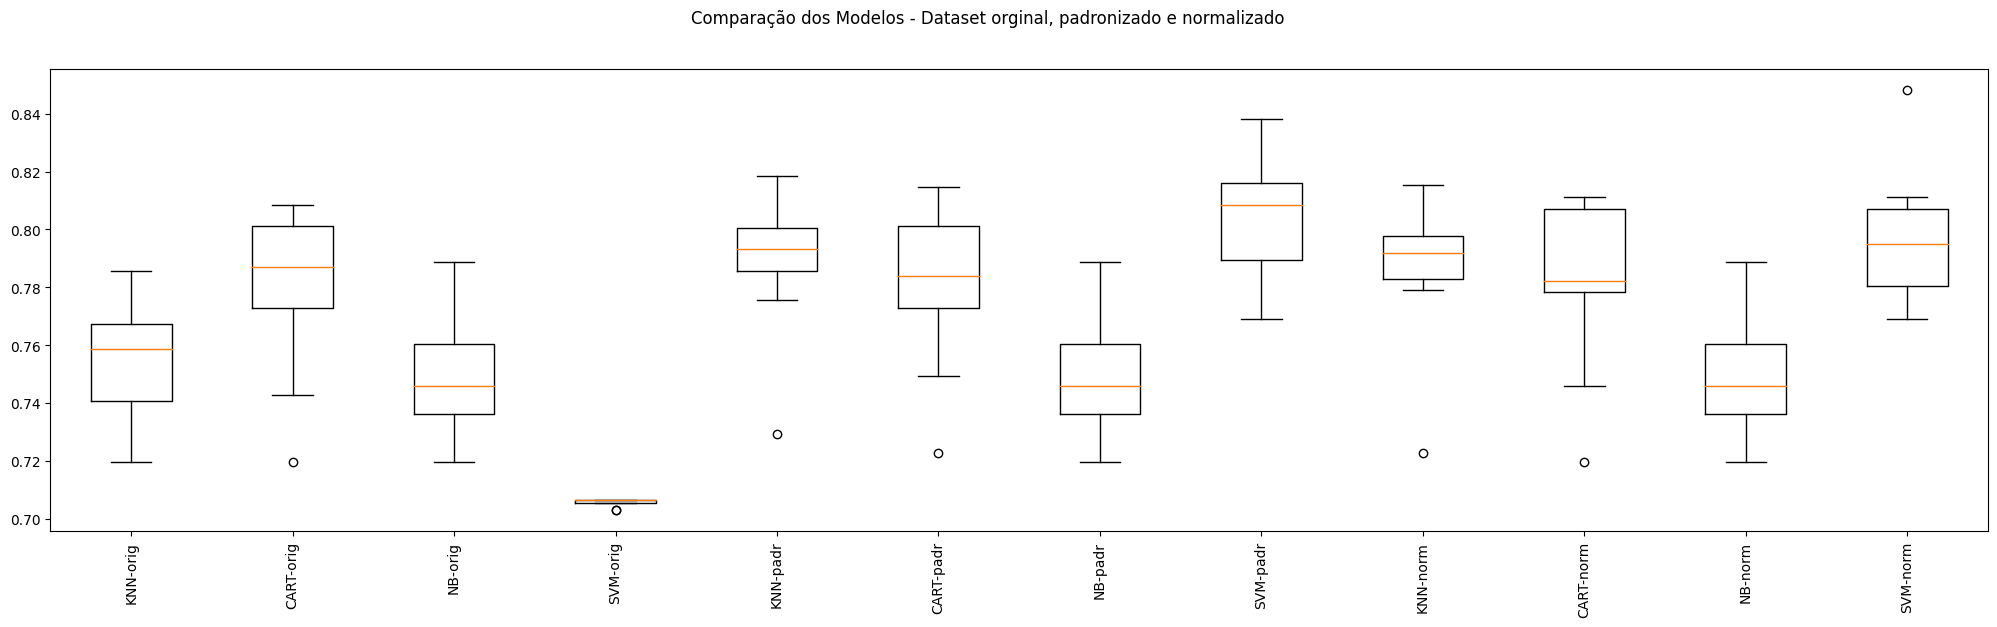

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler()) # padronização
min_max_scaler = ('MinMaxScaler', MinMaxScaler())      # normalização


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.762210 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
Sem tratamento de missings: knn-padr - Melhor: 0.801851 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}
Sem tratamento de missings: knn-norm - Melhor: 0.801515 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}


In [ ]:
# Tuning do CART

np.random.seed(7) # definindo uma semente global para este bloco

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeClassifier())

# Lista de pipelines
pipelines = []

# Adicionando pipelines para cada modelo
pipelines.append(('cart-orig', Pipeline(steps=[cart])))
pipelines.append(('cart-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('cart-norm', Pipeline(steps=[min_max_scaler, cart])))

# Dicionário de parâmetros para ajuste de hiperparâmetros
param_grids = {
    'CART__max_depth': [None, 10, 20, 30],
    'CART__min_samples_split': [2, 5, 10],
    'CART__min_samples_leaf': [1, 2, 4]
}


# Loop para executar GridSearchCV para cada pipeline
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grids, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


cart-orig - Melhor: 0.796234 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 10}
cart-padr - Melhor: 0.797224 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 5}
cart-norm - Melhor: 0.796895 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}


In [ ]:
# Tuning do Naive-Bayes

# Definindo os componentes do pipeline
naive_bayes = ('NB', GaussianNB())

# Lista de pipelines
pipelines = []

# Adicionando pipelines para cada modelo
pipelines.append(('nb-orig', Pipeline(steps=[naive_bayes])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, naive_bayes])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, naive_bayes])))

# Dicionário de parâmetros para ajuste de hiperparâmetros
param_grid = {
    'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Loop para executar GridSearchCV para cada pipeline
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


nb-orig - Melhor: 0.748017 usando {'NB__var_smoothing': 1e-09}
nb-padr - Melhor: 0.748017 usando {'NB__var_smoothing': 1e-09}
nb-norm - Melhor: 0.748017 usando {'NB__var_smoothing': 1e-09}


In [ ]:
# Tuning do SVM
import time
from tqdm import tqdm

start_time = time.time()

np.random.seed(7) # definindo uma semente global para este bloco

# Definindo os componentes do pipeline
svm = ('SVM', SVC())

# Lista de pipelines
pipelines = []

# Adicionando pipelines para cada modelo
pipelines.append(('svm-orig', Pipeline(steps=[svm])))
pipelines.append(('svm-padr', Pipeline(steps=[standard_scaler, svm])))
pipelines.append(('svm-norm', Pipeline(steps=[min_max_scaler, svm])))

# Dicionário de parâmetros para ajuste de hiperparâmetros
param_grid = {
    'SVM__C': [0.1, 0.3, 1, 10],
    'SVM__kernel': ['rbf', 'poly', 'sigmoid']
}

print('# Verificando cada pipeline..')
#for name, model in pipelines:
for name, model in tqdm(pipelines):

    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

    # Imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

end_time = time.time()
execution_time = end_time - start_time
print(f"\nTempo de execução total: {execution_time} segundos")


# Verificando cada pipeline..


 33%|███▎      | 1/3 [00:18<00:37, 18.58s/it]

svm-orig - Melhor: 0.705416 usando {'SVM__C': 0.1, 'SVM__kernel': 'rbf'}


 67%|██████▋   | 2/3 [01:13<00:39, 39.80s/it]

svm-padr - Melhor: 0.806805 usando {'SVM__C': 10, 'SVM__kernel': 'rbf'}


100%|██████████| 3/3 [01:44<00:00, 34.97s/it]

svm-norm - Melhor: 0.801520 usando {'SVM__C': 10, 'SVM__kernel': 'rbf'}

Tempo de execução total: 104.93104672431946 segundos


## Finalização do Modelo

" A escolha do modelo deve ser a que resultar no melhor trade-off entre os dados de treino, como dos dados de teste."

O modelo escolhido foi o SVM padronizado porque apresentou a maior acurácia.


In [ ]:
# Avaliação do modelo com o conjunto de teste

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = SVC(C=10, kernel="rbf")
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8192612137203166


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)


SVC(C=10)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!

data = {'Education':  [1, 2, 3],
        'JoiningYear': [2015, 2016, 2017],
        'PaymentTier': [2, 2, 1],
        'Age': [30, 22, 40],
        'Gender': [2, 1, 1],
        'EverBenched': [0, 0, 1],
        'ExperienceInCurrentDomain': [5, 1, 3],
        }

atributos = ['Education', 'JoiningYear', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:7].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.47278536  0.29377067 -1.24656004  0.23559798  1.20567894 -0.32465591
   1.32209891]
 [ 1.49854213  0.90893426 -1.24656004 -1.51037498 -0.8294082  -0.32465591
  -1.25272952]
 [ 3.46986961  1.52409785 -3.01151004  2.41806417 -0.8294082   3.08018419
   0.03468469]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 1 0]


In [ ]:
from google.colab import files
from joblib import dump

# Salvar o modelo
dump(model, 'modelo_treinado.joblib')

# Baixar o arquivo para o seu computador
files.download('modelo_treinado.joblib')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>